<a href="https://colab.research.google.com/github/brinda-lax/Elite-intership/blob/main/Project_2_Lung_cancer_prediction_with_ML.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [ ]:
df=pd.read_csv('survey lung cancer.csv')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 309 entries, 0 to 308
Data columns (total 16 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   GENDER                 309 non-null    object
 1   AGE                    309 non-null    int64 
 2   SMOKING                309 non-null    int64 
 3   YELLOW_FINGERS         309 non-null    int64 
 4   ANXIETY                309 non-null    int64 
 5   PEER_PRESSURE          309 non-null    int64 
 6   CHRONIC DISEASE        309 non-null    int64 
 7   FATIGUE                309 non-null    int64 
 8   ALLERGY                309 non-null    int64 
 9   WHEEZING               309 non-null    int64 
 10  ALCOHOL CONSUMING      309 non-null    int64 
 11  COUGHING               309 non-null    int64 
 12  SHORTNESS OF BREATH    309 non-null    int64 
 13  SWALLOWING DIFFICULTY  309 non-null    int64 
 14  CHEST PAIN             309 non-null    int64 
 15  LUNG_CANCER            

In [ ]:
df.tail()

,GENDER,AGE,SMOKING,YELLOW_FINGERS,ANXIETY,PEER_PRESSURE,CHRONIC DISEASE,FATIGUE,ALLERGY,WHEEZING,ALCOHOL CONSUMING,COUGHING,SHORTNESS OF BREATH,SWALLOWING DIFFICULTY,CHEST PAIN,LUNG_CANCER
304,F,56,1,1,1,2,2,2,1,1,2,2,2,2,1,YES
305,M,70,2,1,1,1,1,2,2,2,2,2,2,1,2,YES
306,M,58,2,1,1,1,1,1,2,2,2,2,1,1,2,YES
307,M,67,2,1,2,1,1,2,2,1,2,2,2,1,2,YES
308,M,62,1,1,1,2,1,2,2,2,2,1,1,2,1,YES


In [ ]:
df['GENDER']=df['GENDER'].astype(str)
df['LUNG_CANCER']=df['LUNG_CANCER'].astype(str)



In [ ]:
from sklearn.preprocessing import OneHotEncoder

In [ ]:
ohe = OneHotEncoder(drop='first',sparse_output=False,dtype=np.int32)

In [ ]:
encoded_df=ohe.fit_transform(df[['GENDER']])

In [ ]:
encoded_df = pd.DataFrame(encoded_df, columns=ohe.get_feature_names_out(['GENDER']))


In [ ]:
encoded_df.head()

,GENDER_M
0,1
1,1
2,0
3,1
4,0


In [ ]:
df=pd.concat([df,encoded_df],axis=1)

In [ ]:
df.head()

,GENDER,AGE,SMOKING,YELLOW_FINGERS,ANXIETY,PEER_PRESSURE,CHRONIC DISEASE,FATIGUE,ALLERGY,WHEEZING,ALCOHOL CONSUMING,COUGHING,SHORTNESS OF BREATH,SWALLOWING DIFFICULTY,CHEST PAIN,LUNG_CANCER,GENDER_M
0,M,69,1,2,2,1,1,2,1,2,2,2,2,2,2,YES,1
1,M,74,2,1,1,1,2,2,2,1,1,1,2,2,2,YES,1
2,F,59,1,1,1,2,1,2,1,2,1,2,2,1,2,NO,0
3,M,63,2,2,2,1,1,1,1,1,2,1,1,2,2,NO,1
4,F,63,1,2,1,1,1,1,1,2,1,2,2,1,1,NO,0


In [ ]:
df.drop(columns='GENDER',inplace=True)

In [ ]:
import seaborn as sns

<Axes: xlabel='LUNG_CANCER', ylabel='AGE'>

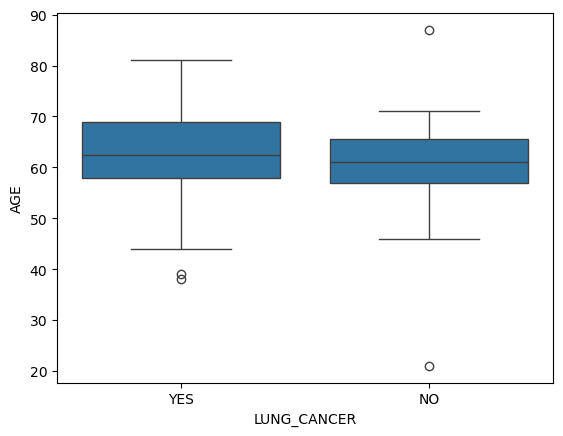

In [ ]:
sns.boxplot(x=df['LUNG_CANCER'],y=df['AGE'])

In [ ]:
df.columns = df.columns.str.strip()


In [ ]:
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

In [ ]:
le=LabelEncoder()

In [ ]:
df['LUNG_CANCER'] = le.fit_transform(df['LUNG_CANCER'])


In [ ]:
df.head()

,AGE,SMOKING,YELLOW_FINGERS,ANXIETY,PEER_PRESSURE,CHRONIC DISEASE,FATIGUE,ALLERGY,WHEEZING,ALCOHOL CONSUMING,COUGHING,SHORTNESS OF BREATH,SWALLOWING DIFFICULTY,CHEST PAIN,LUNG_CANCER,GENDER_M
0,69,1,2,2,1,1,2,1,2,2,2,2,2,2,1,1
1,74,2,1,1,1,2,2,2,1,1,1,2,2,2,1,1
2,59,1,1,1,2,1,2,1,2,1,2,2,1,2,0,0
3,63,2,2,2,1,1,1,1,1,2,1,1,2,2,0,1
4,63,1,2,1,1,1,1,1,2,1,2,2,1,1,0,0


In [ ]:
X=df.drop(columns='LUNG_CANCER')
y=df['LUNG_CANCER']

In [ ]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2, random_state=42,stratify=y)


In [ ]:
rf = RandomForestClassifier(random_state=42)


In [ ]:
rf.fit(X_train, y_train)


RandomForestClassifier(random_state=42)

In [ ]:
y_pred = rf.predict(X_test)


In [ ]:
rf.score(X_test,y_test)

0.9032258064516129

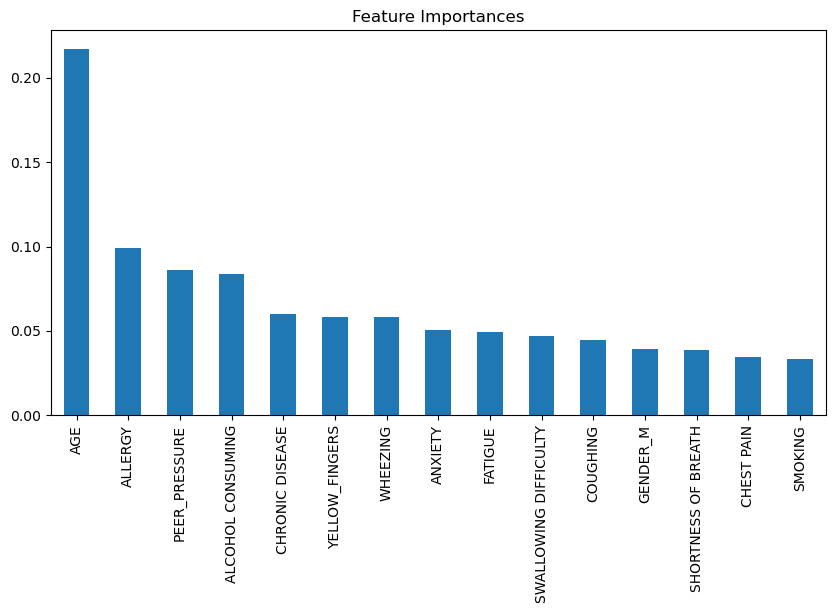

In [ ]:
import matplotlib.pyplot as plt
feature_importances = pd.Series(rf.feature_importances_, index=X.columns)
feature_importances.sort_values(ascending=False).plot(kind='bar', figsize=(10, 5))
plt.title("Feature Importances")
plt.show()


In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

# Define the base model
rf = RandomForestClassifier(random_state=42)

# Define the hyperparameter grid
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'bootstrap': [True, False]
}


In [ ]:
# Setup GridSearchCV
grid_search = GridSearchCV(estimator=rf, param_grid=param_grid,
                           cv=5, n_jobs=-1, verbose=2, scoring='accuracy')

# Fit to your training data
grid_search.fit(X_train, y_train)


Fitting 5 folds for each of 216 candidates, totalling 1080 fits


GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=42), n_jobs=-1,
             param_grid={'bootstrap': [True, False],
                         'max_depth': [None, 10, 20, 30],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [100, 200, 300]},
             scoring='accuracy', verbose=2)

In [ ]:
best_rf = grid_search.best_estimator_

# Predict and evaluate
from sklearn.metrics import classification_report, confusion_matrix

y_pred = best_rf.predict(X_test)

print("Best Parameters:", grid_search.best_params_)
print("Accuracy:", best_rf.score(X_test, y_test))
print("\nClassification Report:\n", classification_report(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))


Best Parameters: {'bootstrap': True, 'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 200}
Accuracy: 0.8548387096774194

Classification Report:
               precision    recall  f1-score   support

           0       0.40      0.25      0.31         8
           1       0.89      0.94      0.92        54

    accuracy                           0.85        62
   macro avg       0.65      0.60      0.61        62
weighted avg       0.83      0.85      0.84        62


Confusion Matrix:
 [[ 2  6]
 [ 3 51]]


In [ ]:
final_model = RandomForestClassifier(
    bootstrap=True,
    max_depth=None,
    min_samples_leaf=1,
    min_samples_split=5,
    n_estimators=200,
    random_state=42
)

In [ ]:
final_model.fit(X_train, y_train)

RandomForestClassifier(min_samples_split=5, n_estimators=200, random_state=42)

In [ ]:
y_new=final_model.predict(X_test)

In [ ]:
import joblib
joblib.dump(final_model,"lung_cancer_model.pkl")


['lung_cancer_model.pkl']

In [ ]:
model = joblib.load("lung_cancer_model.pkl")

In [ ]:
# Feature names (in order)
feature_names = [
    'AGE', 'SMOKING', 'YELLOW_FINGERS', 'ANXIETY', 'PEER_PRESSURE',
    'CHRONIC DISEASE', 'FATIGUE', 'ALLERGY', 'WHEEZING',
    'ALCOHOL CONSUMING', 'COUGHING', 'SHORTNESS OF BREATH',
    'SWALLOWING DIFFICULTY', 'CHEST PAIN', 'GENDER_M'
]

# Instructions to the user
print("Please enter the following details:")
print("Use 1 for Yes / Male, 0 for No / Female")

# Take input
user_inputs = []
for feature in feature_names:
    value = input(f"Enter {feature.replace('_', ' ').title()}: ")
    user_inputs.append(int(value))  # assuming all inputs are integers

# Convert to numpy array
new_sample = np.array([user_inputs])

# Predict
prediction = model.predict(new_sample)

# Output
gender = user_inputs[-1]  # GENDER_M is the last column
a = 'He' if gender == 1 else 'She'
if prediction[0] == 1:
    print(f'\nYes, {a} is likely to have lung cancer.')
else:
    print(f'\nNo, {a} is unlikely to have lung cancer.')


Please enter the following details:
Use 1 for Yes / Male, 0 for No / Female


Enter Age:  60
Enter Smoking:  1
Enter Yellow Fingers:  1
Enter Anxiety:  1
Enter Peer Pressure:  1
Enter Chronic Disease:  1
Enter Fatigue:  1
Enter Allergy:  1
Enter Wheezing:  1
Enter Alcohol Consuming:  1
Enter Coughing:  1
Enter Shortness Of Breath:  1
Enter Swallowing Difficulty:  1
Enter Chest Pain:  1
Enter Gender M:  1



No, He is unlikely to have lung cancer.


C:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
